# Activation Functions 

In [2]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mpl.rcParams.update({'font.size': 18})

def plot_activation_function(name, fn, dfn):
    """
    Plots a function and its derivative in the [-5, 5] range.
    """
    xs = np.linspace(-5, 5, 10000)
    fig = plt.figure(figsize=[10, 5], dpi=300)
    sns.lineplot(xs, fn(xs), label='f(x)')
    sns.lineplot(xs, dfn(xs), label='df/dx')
    plt.title(f"{name} Function")
    plt.grid(b=True, which='major')
    plt.grid(b=True, which='minor')

## Logistic Function

This function is most commonly used in the output layer to produce probabilities in a binary classification task.
Within hidden layers of a feedforward network, its usage is problematic due to being non-centered and having small derivative outside of $[-4, 4$] range. However, other architectures (LSTM and GRU in the case of RNNs) have adjustments that make usage of the logistic function possible.

$$ f(x) = \frac{e^x}{e^{x}+1} $$

$$ \frac{df}{dx} = \frac{e^x}{(e^x+1)^2} $$

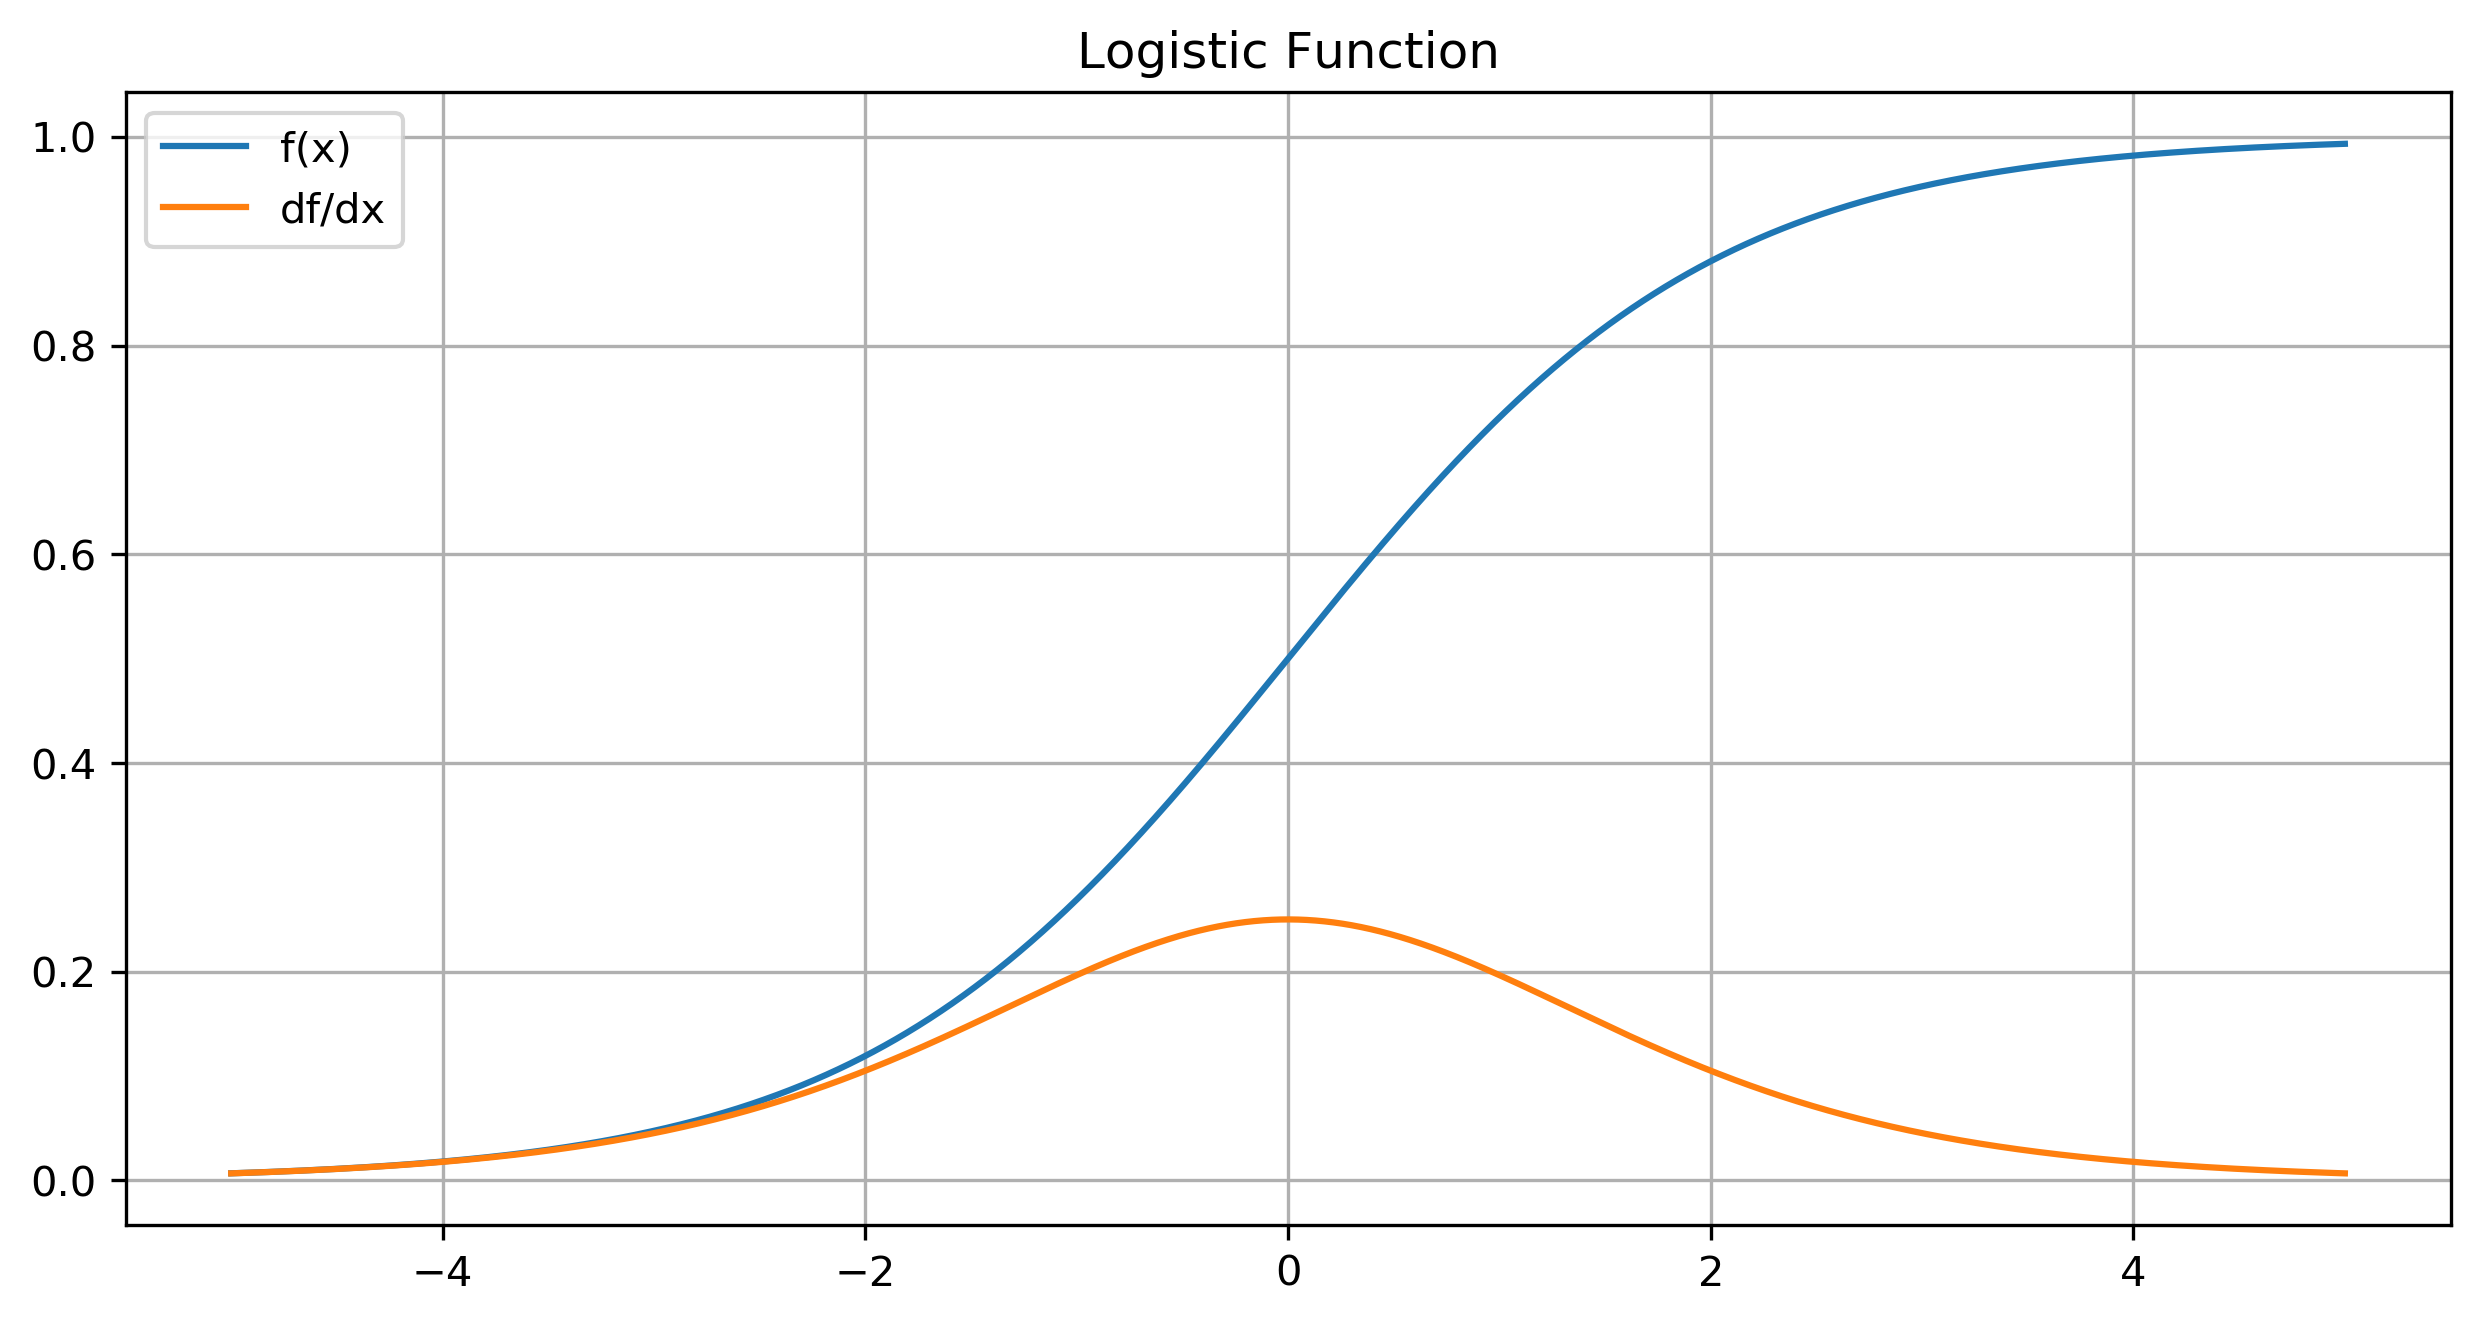

In [3]:
def logistic(xs):
    return 1 / (1 + np.exp(-xs))

def logistic_derivative(xs):
    return np.exp(xs) / ((1 + np.exp(xs)) ** 2)

plot_activation_function("Logistic", logistic, logistic_derivative)

## Tanh Function

A rescaled version of the logistic function. In particular, this function is zero-centered, but the deritivative is still very small outside of $[-4, 4]$ range.

$$
\begin{align}
    f(x) & = 2L(2x) - 1  \\
    \frac{df}{dx} & = 4L'(2x)
\end{align}
$$

If we use the definition of the logistic function to expand the formulas:
$$
\begin{align}
    f(x) & = 2 * \frac{e^{2x}}{e^{2x}+1} - 1 \\
    \frac{df}{dx} & = 4 * \frac{e^{2x}}{(e^{2x}+1)^2}
\end{align}
$$

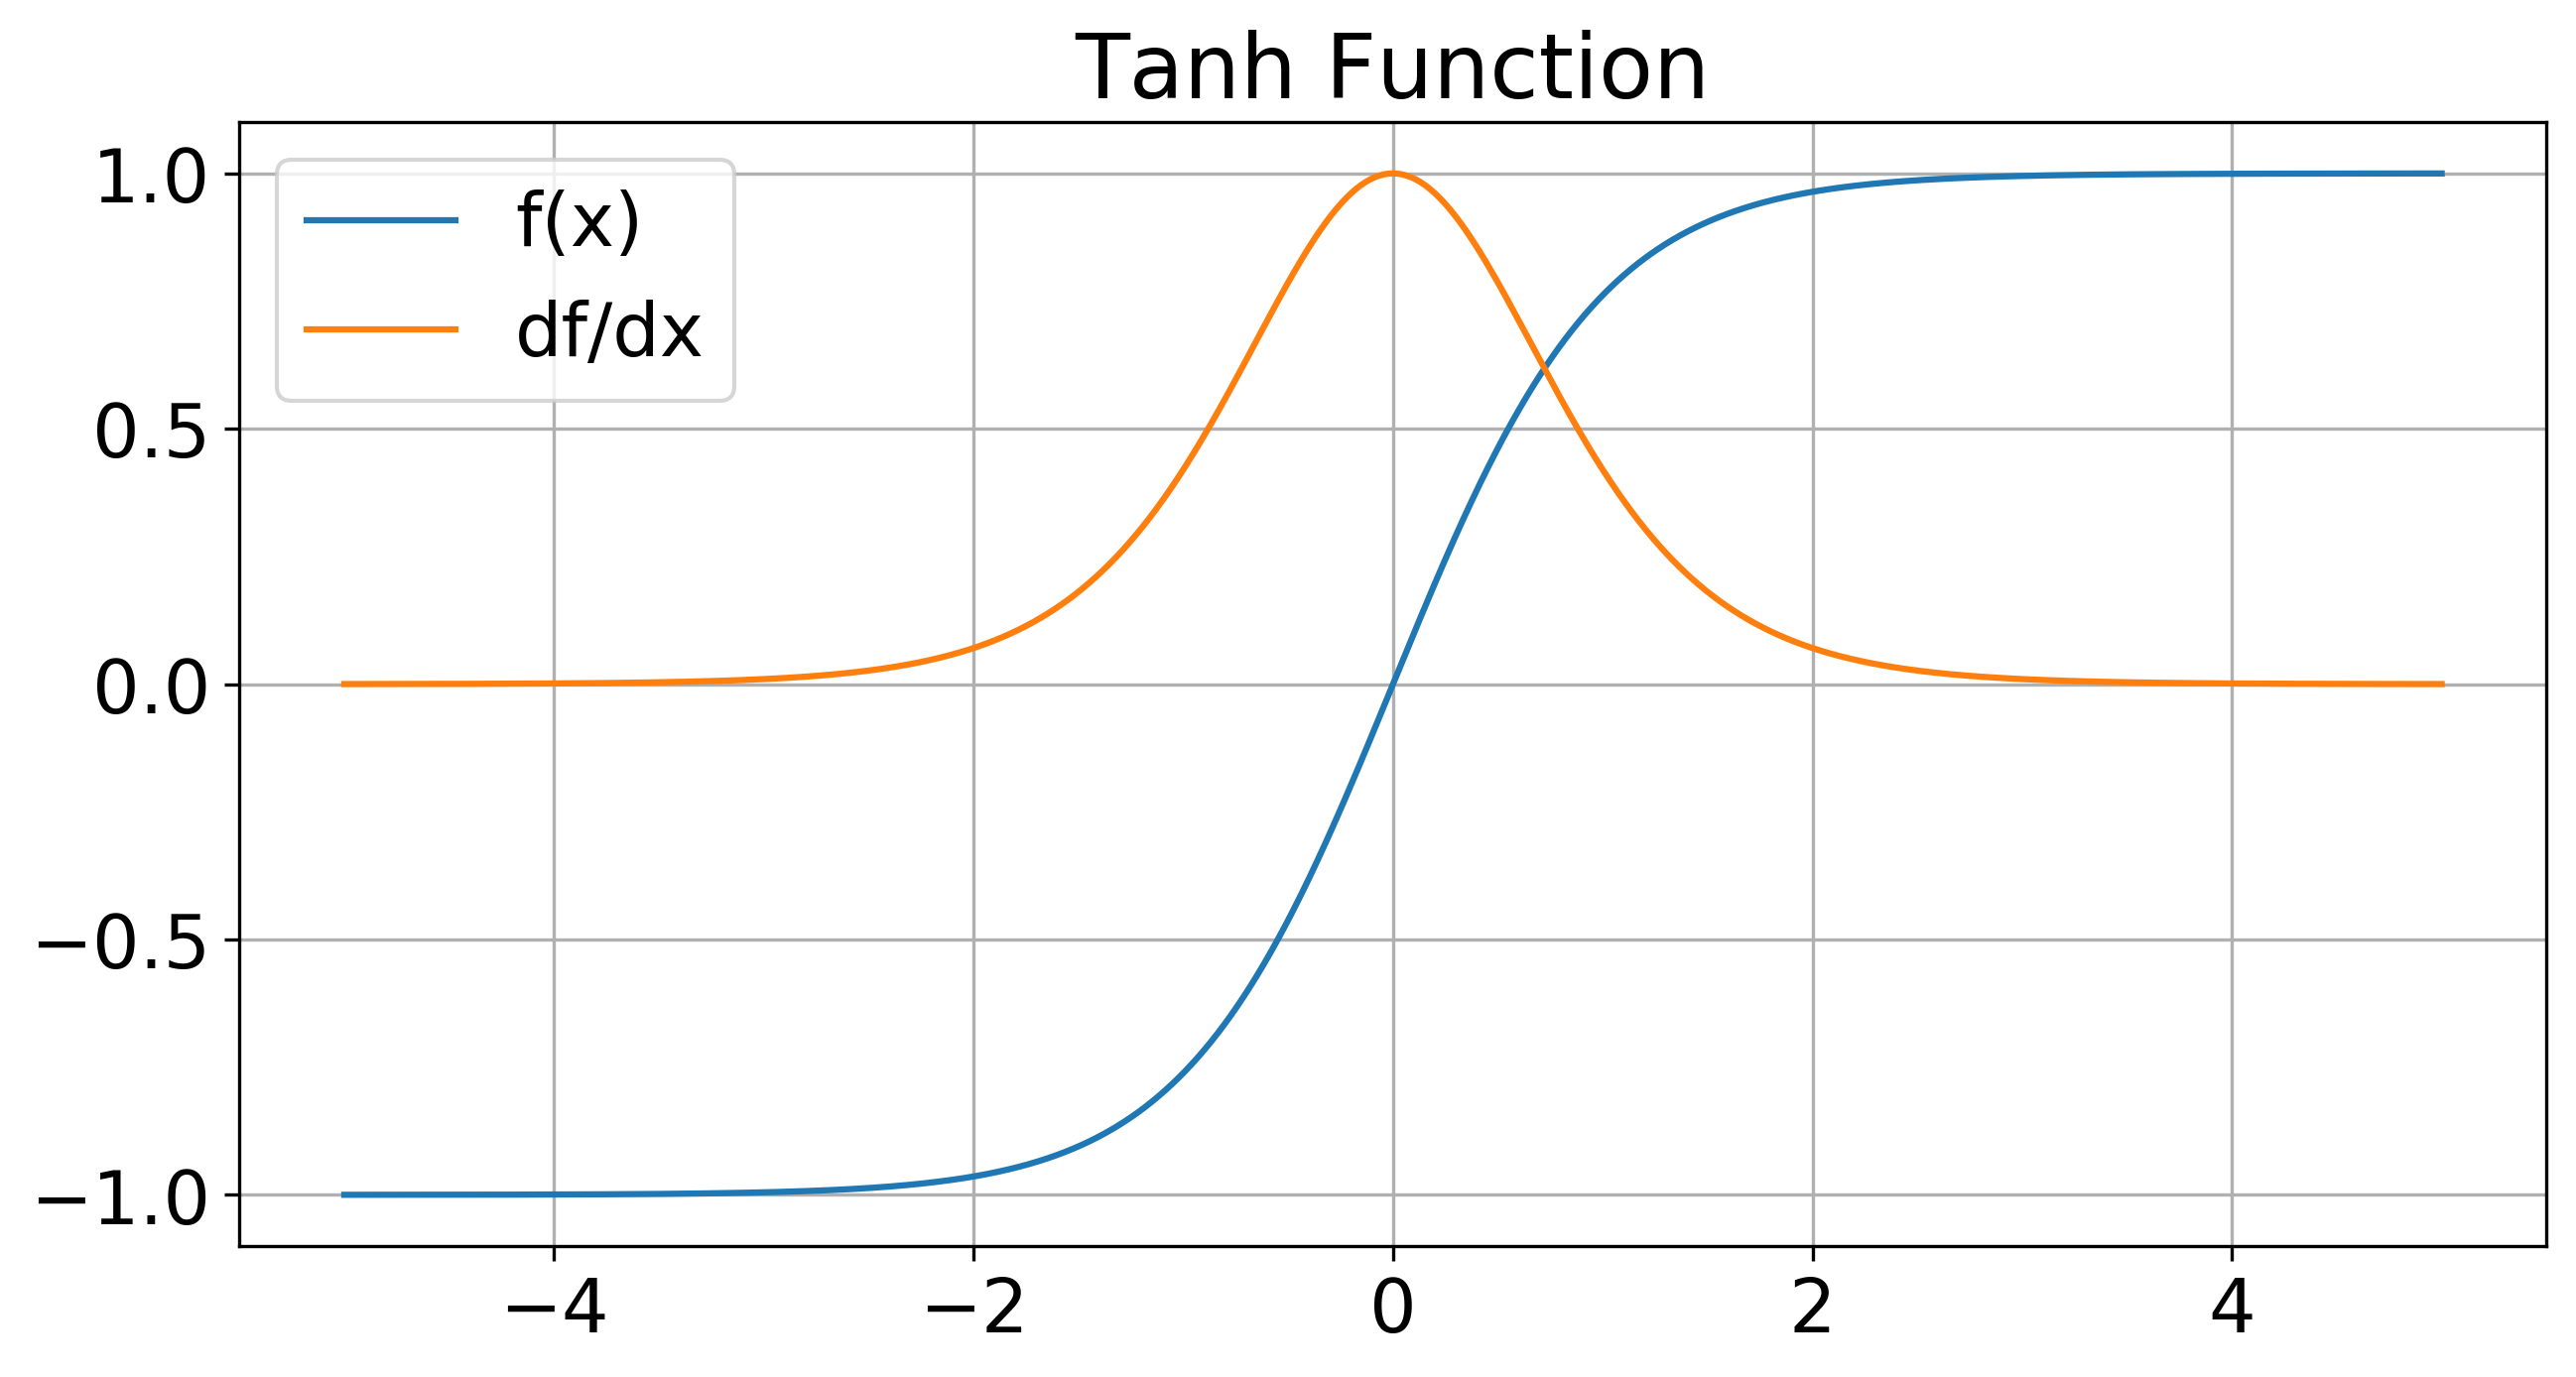

In [17]:
def tanh(xs):
    return 2 * logistic(2 * xs) - 1

def tanh_derivative(xs):
    return 4 * logistic_derivative(2 * xs)

plot_activation_function('Tanh', tanh, tanh_derivative)

## ReLU Function

$$ 
f(x) = 
\begin{cases}
  x & \text{for }x \ge 0 \\    
  0 & \text{for } x < 0
\end{cases}
$$

<br>

$$ 
\frac{df}{dx} =
\begin{cases}
  1 & \text{for }x > 0 \\    
  0 & \text{for } x < 0 \\
  \text{undefined} & \text{for } x = 0
\end{cases}
$$

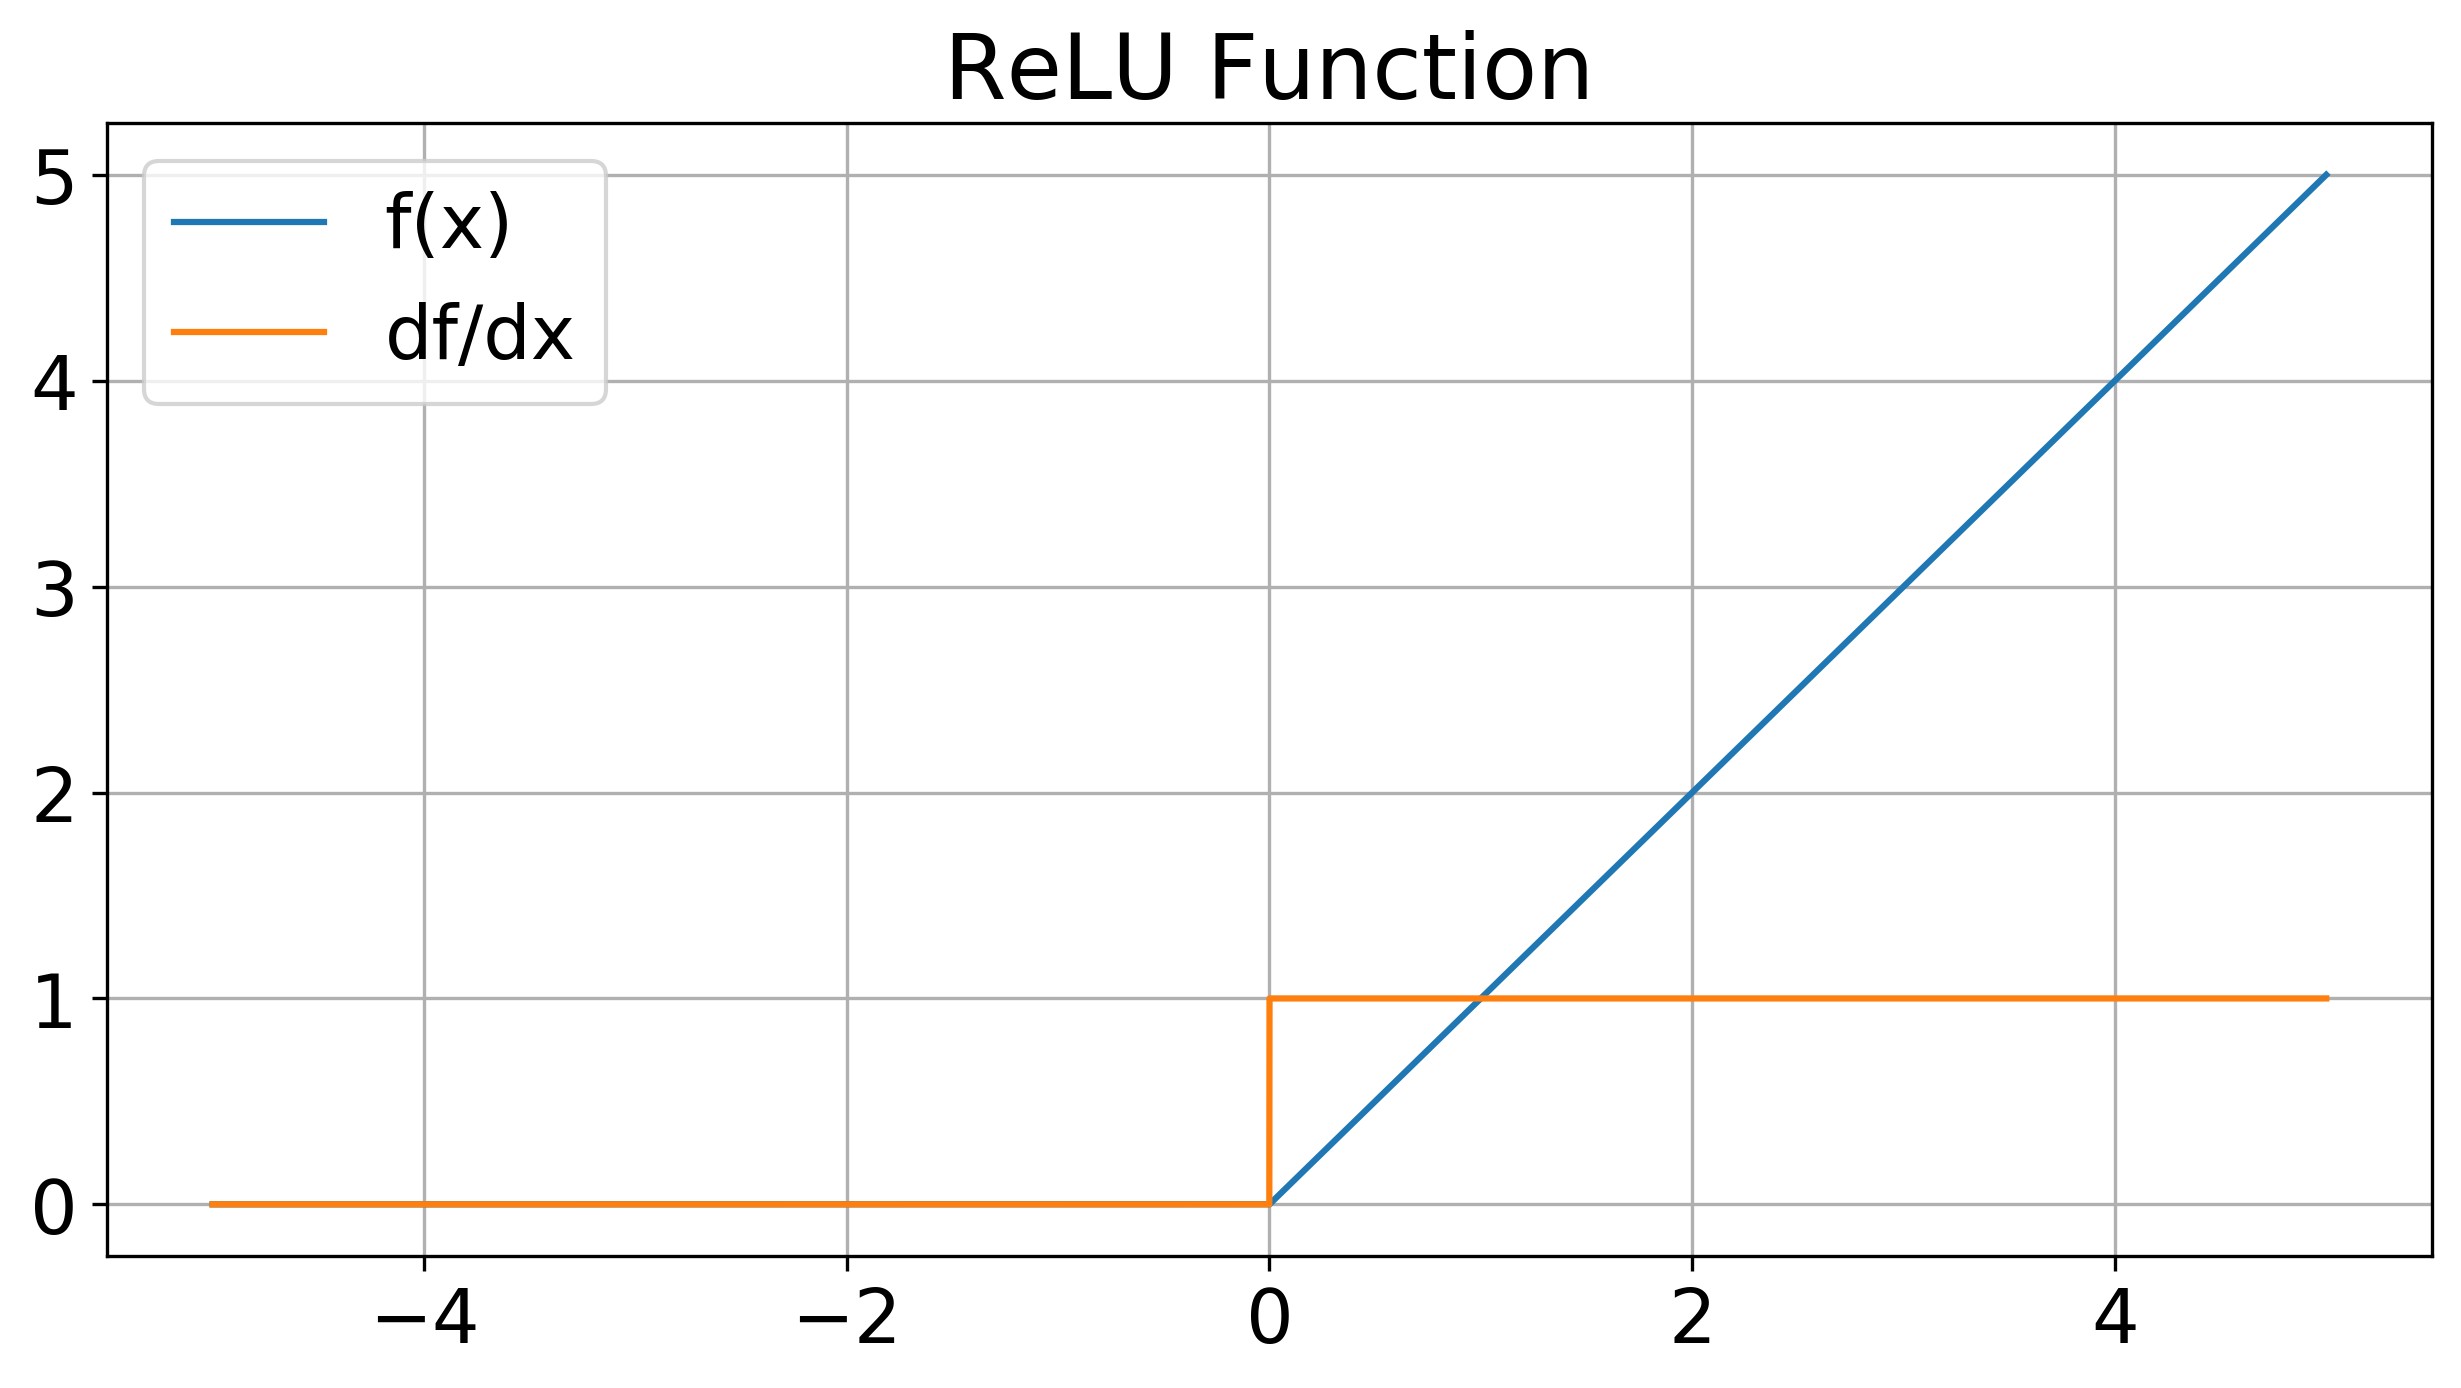

In [15]:
def relu(xs: np.array):
    neg = xs < 0
    pos = ~neg
    y = np.empty(xs.shape)
    y[pos] = xs[pos]
    y[neg] = 0
    return y

def relu_derivative(xs):
    neg = xs < 0
    pos = ~neg
    y = np.empty(xs.shape)
    y[pos] = 1
    y[neg] = 0
    return y

plot_activation_function('ReLU', relu, relu_derivative)

## Leaky ReLU Function

$$ f(x) = $$
\begin{cases}
  x & \text{for }x \ge 0 \\    
  \alpha x & \text{for } x < 0
\end{cases}

<br>

$$ \frac{df}{dx} = $$
\begin{cases}
  1 & \text{for }x > 0 \\    
  \alpha & \text{for } x < 0 \\
  \text{undefined} & \text{for } x = 0
\end{cases}

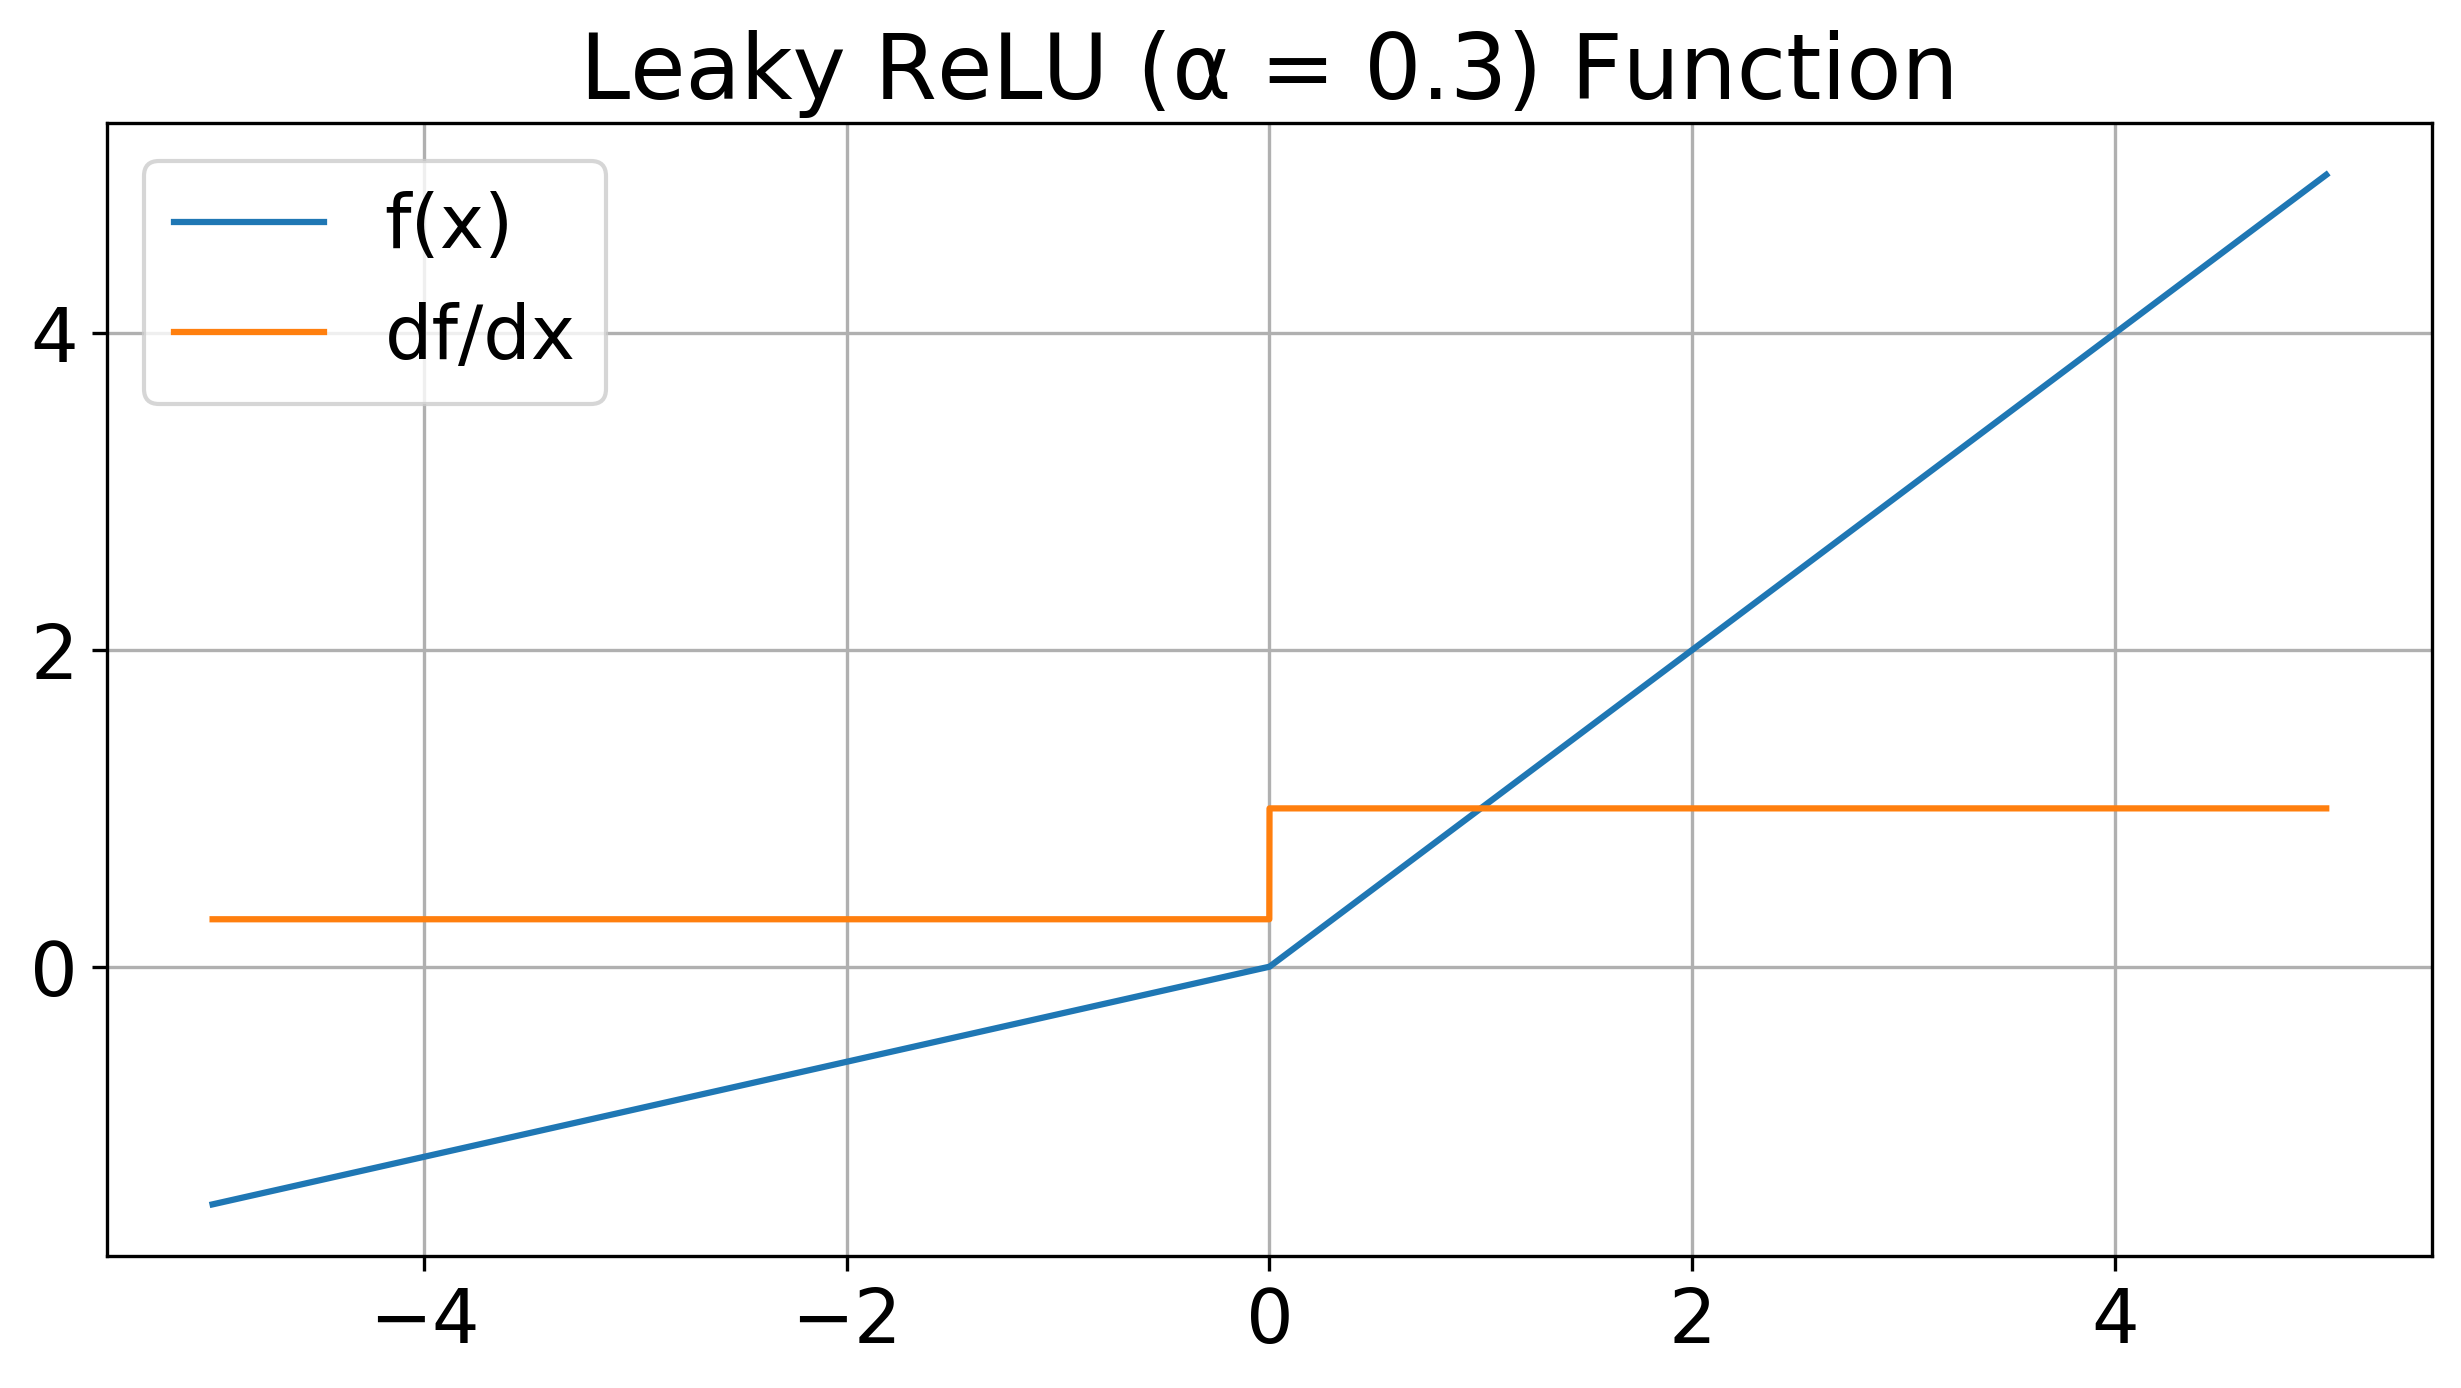

In [14]:
def leaky_relu(xs: np.array, alpha: float):
    neg = xs < 0
    pos = ~neg
    y = np.empty(xs.shape)
    y[pos] = xs[pos]
    y[neg] = alpha * xs[neg]
    return y

def leaky_relu_derivative(xs, alpha):
    neg = xs < 0
    pos = ~neg
    y = np.empty(xs.shape)
    y[pos] = 1
    y[neg] = alpha
    return y

plot_activation_function(
    'Leaky ReLU (α = 0.3)', 
    lambda xs: leaky_relu(xs, alpha=0.3), 
    lambda xs: leaky_relu_derivative(xs, alpha=0.3)
)

## ELU Function

$$ f(x) = $$
\begin{cases}
  x & \text{for }x \ge 0 \\    
  \alpha (e^x-1) & \text{for } x < 0
\end{cases}

<br>

$$ \frac{df}{dx} = $$
\begin{cases}
  1 & \text{for }x > 0 \\    
  \alpha e^x & \text{for } x < 0 \\
  \text{undefined} & \text{for } x = 0
\end{cases}

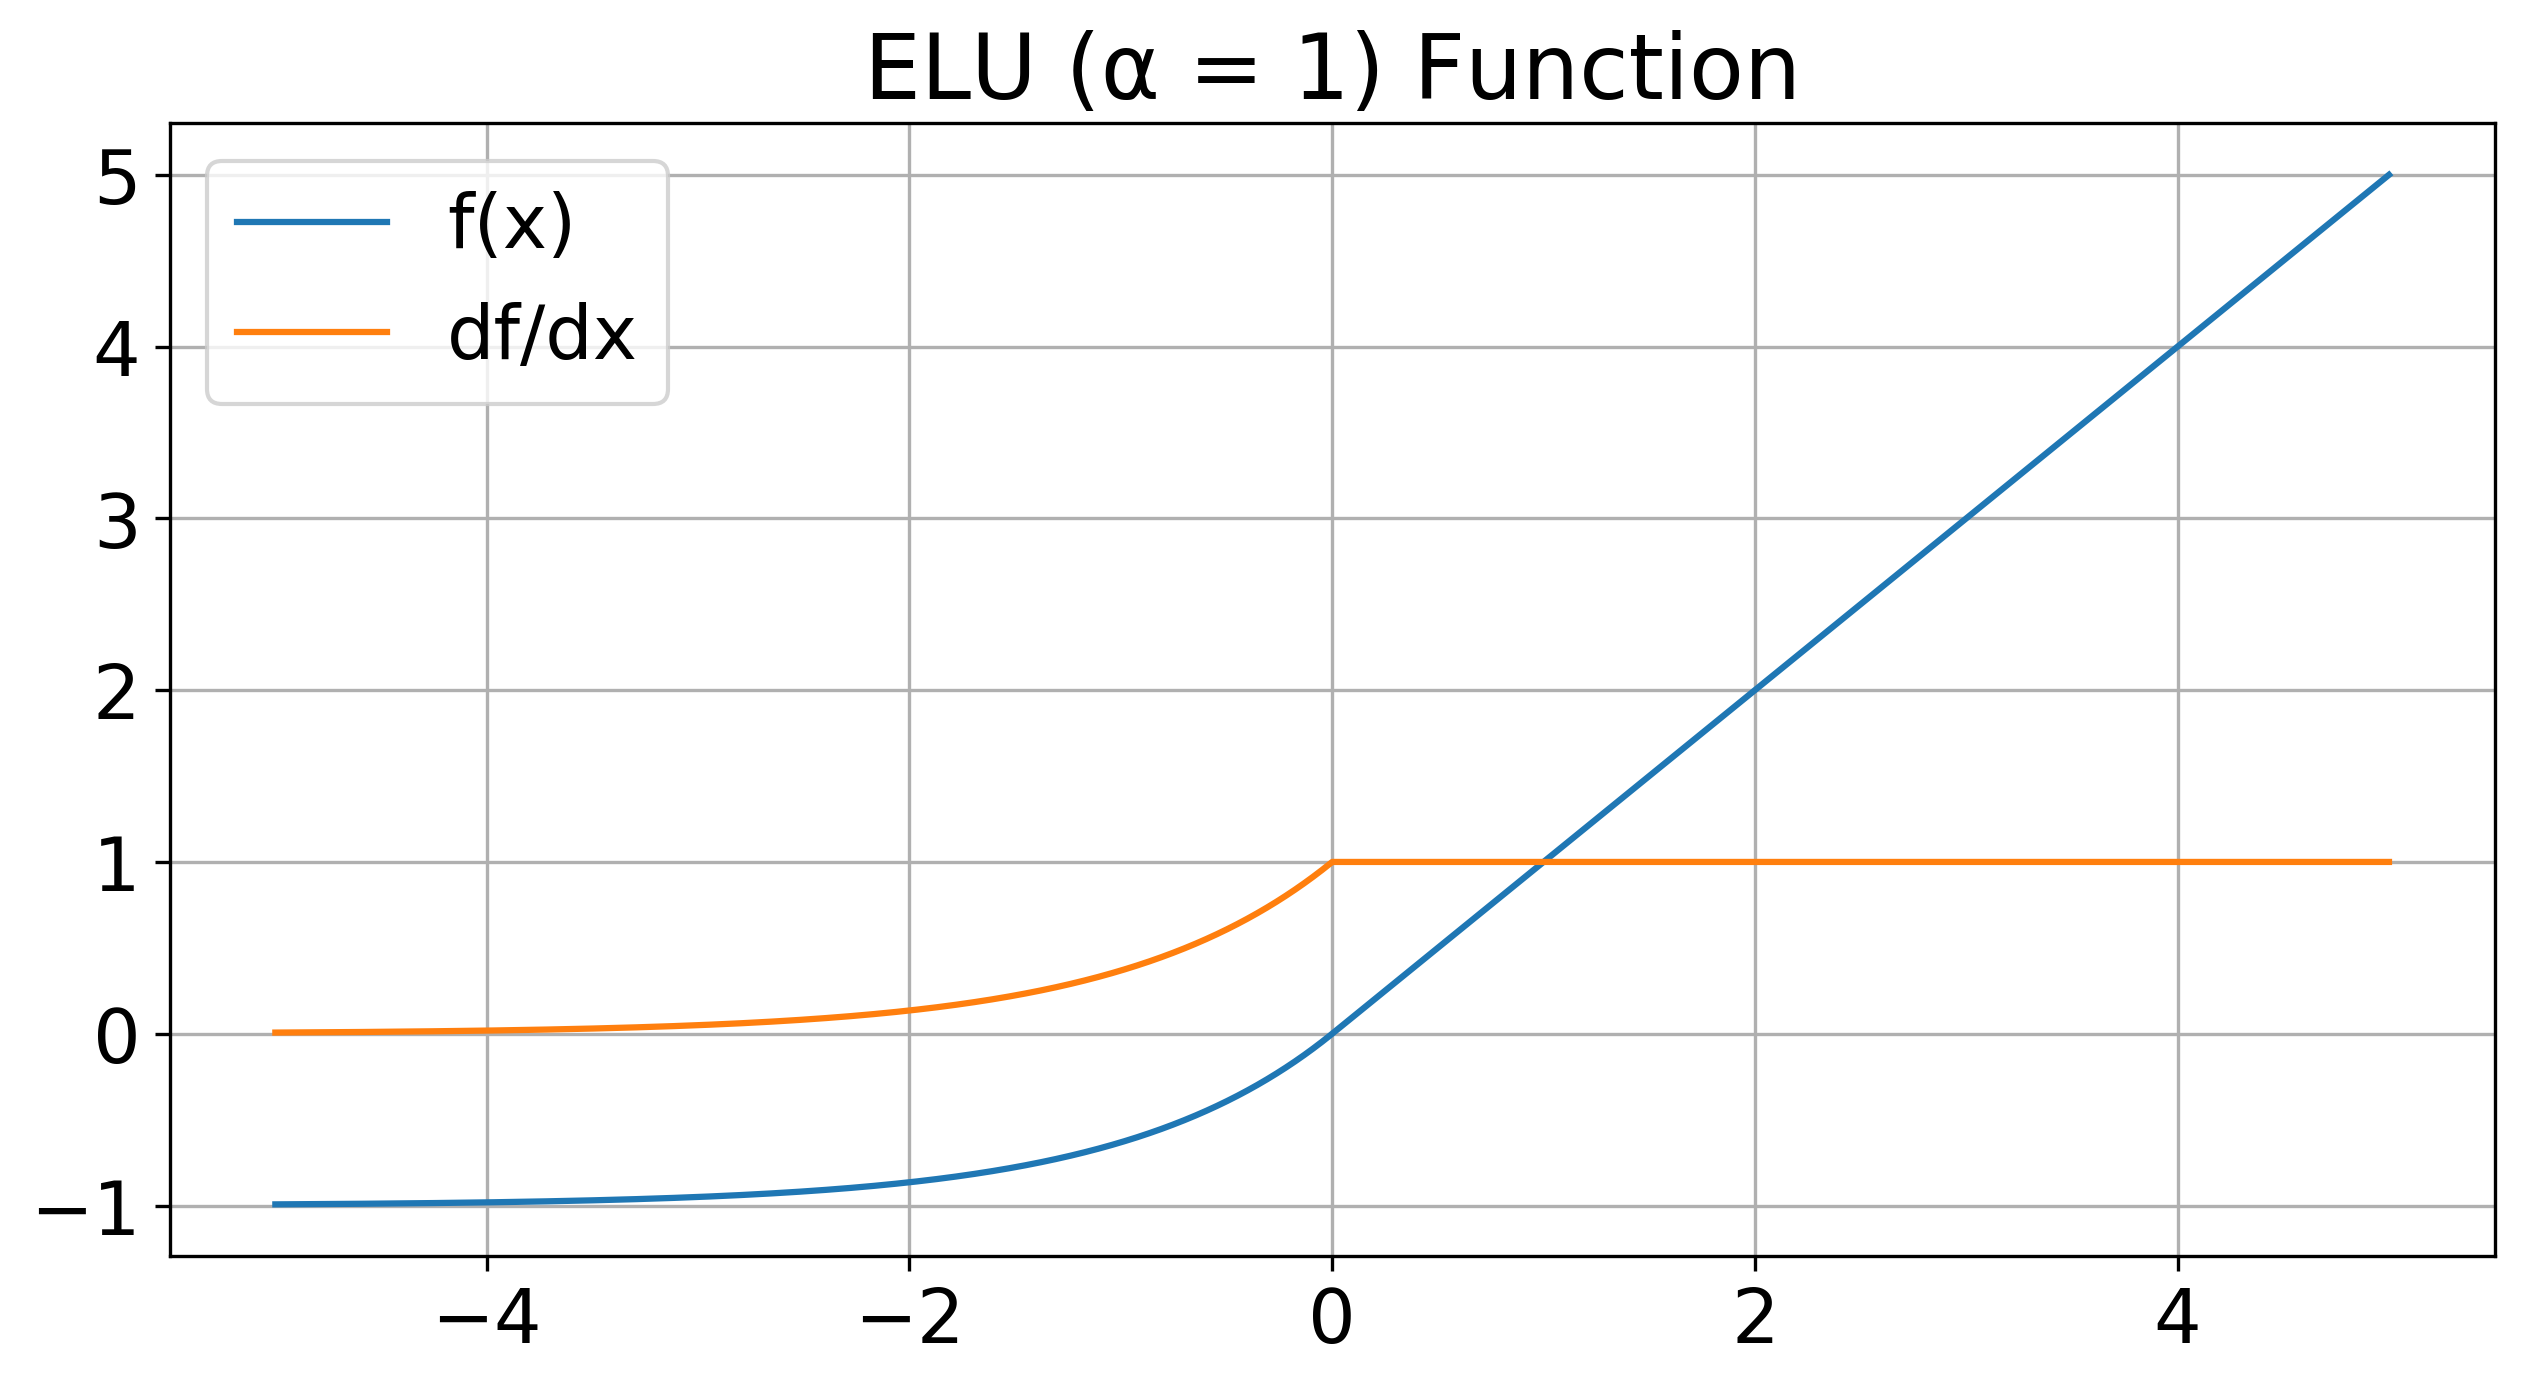

In [35]:
def elu(xs: np.array, alpha: float):
    neg = xs < 0
    pos = ~neg
    y = np.empty(shape=xs.shape)
    y[neg] = alpha * (np.exp(xs[neg]) - 1)
    y[pos] = xs[pos]
    return y

def elu_derivative(xs: np.array, alpha: float):
    neg = xs < 0
    pos = ~neg
    y = np.empty(shape=xs.shape)
    y[neg] = alpha * np.exp(xs[neg])
    y[pos] = 1
    return y

elu_alpha = 1
plot_activation_function(
    f'ELU (α = {elu_alpha})', 
    lambda xs: elu(xs, elu_alpha), 
    lambda xs: elu_derivative(xs, elu_alpha)
)

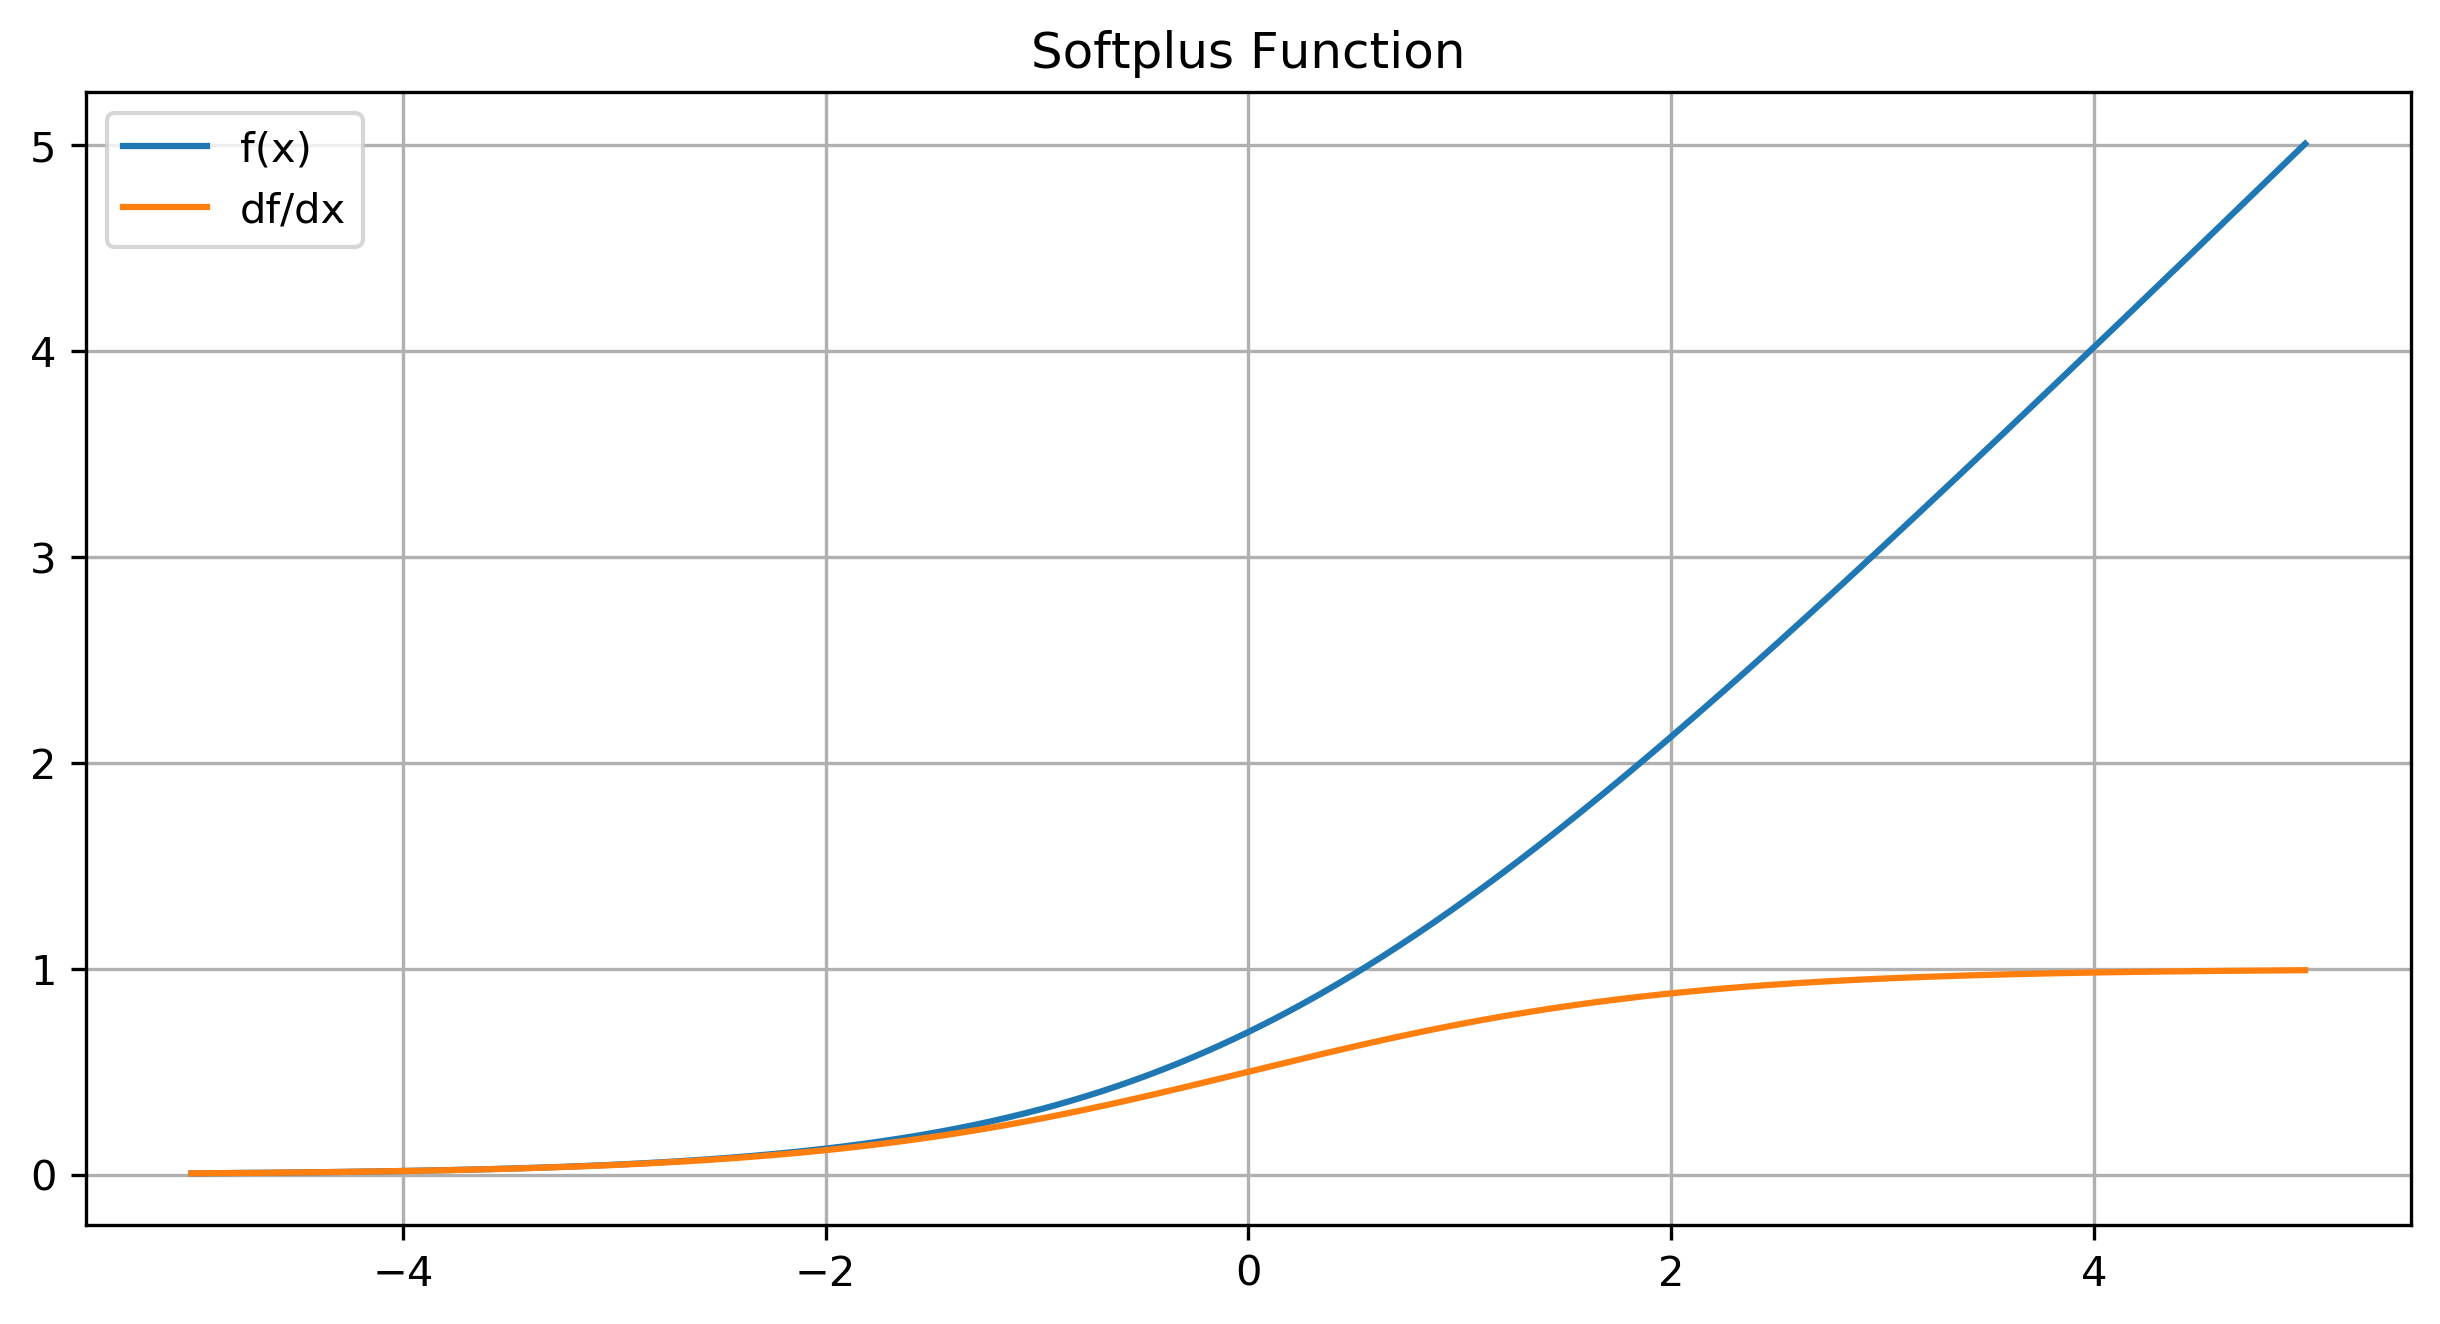

In [5]:
def softplus(xs: np.array):
    return np.log(1 + np.exp(xs))

def softplus_derivative(xs: np.array):
    return logistic(xs)

plot_activation_function(
    f'Softplus', 
    lambda xs: softplus(xs), 
    lambda xs: softplus_derivative(xs)
)